In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [48]:
t = pd.read_excel('../result/metabo_mean.xlsx')
fba = pd.read_csv('../result/fba_abs.csv', index_col=0)
a = fba.loc[[
    'R00268', 'R01056', 'R01049', 'R04779', 
    'R00342', 'R01082', 'R01325', 'R02740'
]].sort_index()
a.index = [
    'akg', 'R5P→R5P', 'PRPP', 'F6P→F1,6P', 'Oxaloacetate, Malate', 
    'Malate, Fumarate', 'Citrate', 'G6P→F6P'
]

In [50]:
fba.loc[[
    'BIOMASS', 'Glucose_input', 'Oxygen_input', 'Lactate_output', 'R00268', 'R01049'
]]

,Control,Clone A,Clone B
BIOMASS,0.001803,0.003173,0.002333
Glucose_input,0.010767,0.041859,0.023510
Oxygen_input,0.009948,0.017510,0.012875
Lactate_output,0.011147,0.065436,0.033577
R00268,0.002674,0.004707,0.003461
R01049,0.000232,0.000408,0.000300


In [4]:
t.loc[['Glucose 1-phosphate']]

,Control,Clone A,Clone B
Glucose 1-phosphate,1.103544,6.888668,1.545911


In [39]:
b = []
for i in t.columns:
    b.append(sum(t.loc[['Cytosine', 'Uracil', 'Adenine', 'Guanine']][i]))

In [40]:
a.T['PRPP']

Control    0.000232
Clone A    0.000408
Clone B    0.000300
Name: PRPP, dtype: float64

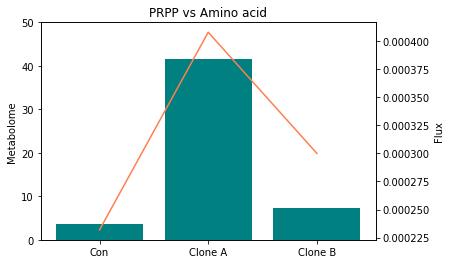

In [41]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='#008080')
ax.set_ylim(0, 50)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['PRPP']), color='#ff7f50')
ax2.set_ylabel('Flux')
ax.set_title('PRPP  vs Amino acid')
plt.show()

In [8]:
b = t.loc['Ribulose 5-phosphate']

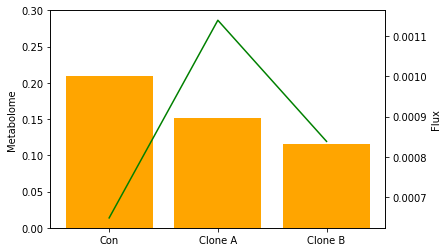

In [9]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 0.3)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['R5P→R5P']), color='green')
ax2.set_ylabel('Flux')
plt.show()

In [10]:
amino_acid = ['Ala', 'Arg', 'Asn', 'Asp', 'Gln', 'Glu', 'Gly', 'Ornithine', 'Pro', 'Ser']

In [33]:
b = sum(t.loc[amino_acid]['Control']), sum(t.loc[amino_acid]['Clone A']), sum(t.loc[amino_acid]['Clone B'])

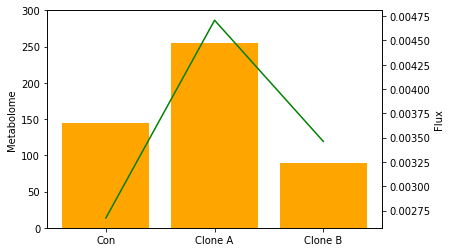

In [12]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 300)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['akg']), color='green')
ax2.set_ylabel('Flux')
plt.show()

In [51]:
b = t.loc['Ribose 5-phosphate']

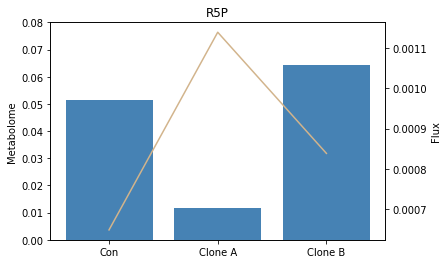

In [52]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='#4682b4')
ax.set_ylim(0, 0.08)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['R5P→R5P']), color='tan')
ax2.set_ylabel('Flux')
ax.set_title('R5P')
plt.show()

In [29]:
b = t.loc['Fructose 1,6-diphosphate']

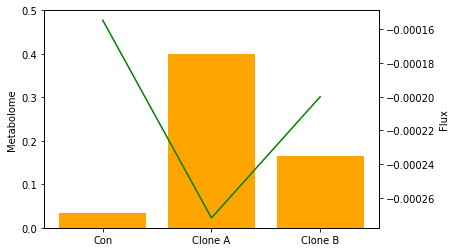

In [31]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 0.5)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['F6P→F1,6P']), color='green')
ax2.set_ylabel('Flux')
plt.show()

In [17]:
b = t.loc['Malic acid']

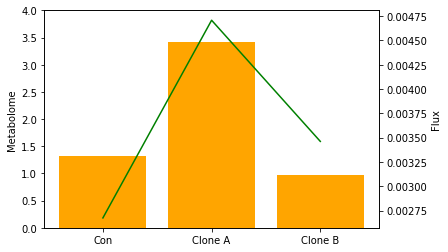

In [18]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 4)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['Malate, Fumarate']), color='green')
ax2.set_ylabel('Flux')
plt.show()

In [19]:
b = t.loc['Malic acid']

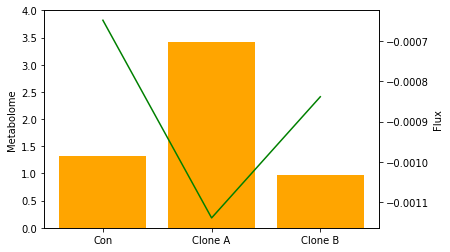

In [20]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 4)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['Oxaloacetate, Malate']), color='green')
ax2.set_ylabel('Flux')
plt.show()

In [21]:
b = t.loc['Citric acid']

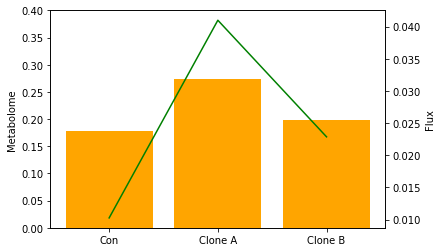

In [22]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 0.4)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['Citrate']), color='green')
ax2.set_ylabel('Flux')
plt.show()

In [23]:
b = t.loc['Fructose 6-phosphate']

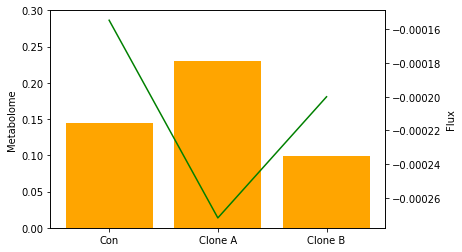

In [24]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 0.3)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['F6P→F1,6P']), color='green')
ax2.set_ylabel('Flux')
plt.show()

In [25]:
b = t.loc['Glucose 6-phosphate']

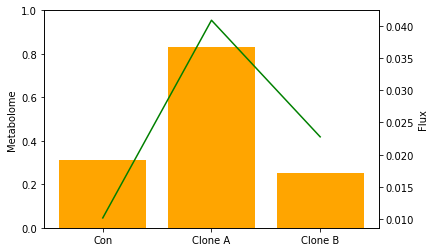

In [26]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color='orange')
ax.set_ylim(0, 1)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['G6P→F6P']), color='green')
ax2.set_ylabel('Flux')
plt.show()